In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
# Load datasets
train_values = pd.read_csv(r"C:\Users\SMILE\Downloads\archive (2)\train_values_wJZrCmI.csv")
train_labels = pd.read_csv(r"C:\Users\SMILE\Downloads\archive (2)\train_labels.csv")
test_values = pd.read_csv(r"C:\Users\SMILE\Downloads\archive (2)\test_values.csv")

In [3]:
# Merge training data and labels
train_data = train_values.merge(train_labels, on="row_id")
X = train_data.drop(columns=["row_id", "poverty_probability"])
y = train_data["poverty_probability"]
X_test = test_values.drop(columns=["row_id"])

# Encode categorical features
def encode_categoricals(df):
    df = df.copy()
    for col in df.select_dtypes(include=["object", "bool"]).columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    return df

X = encode_categoricals(X)
X_test = encode_categoricals(X_test)

# Fill missing values
X = X.fillna(-1)
X_test = X_test.fillna(-1)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

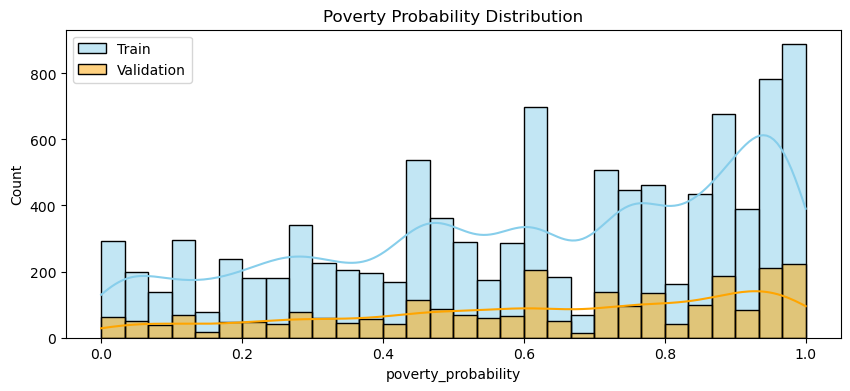

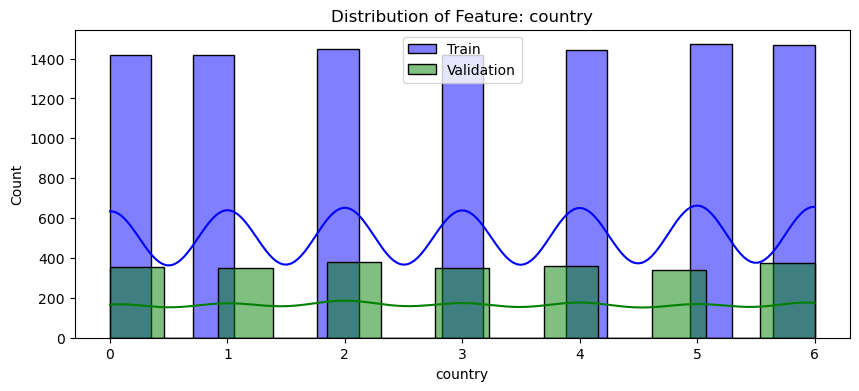

In [4]:

# ------------------ DATA VISUALIZATION ------------------

# Visualize poverty probability distribution
plt.figure(figsize=(10, 4))
sns.histplot(y_train, bins=30, color='skyblue', label="Train", kde=True)
sns.histplot(y_val, bins=30, color='orange', label="Validation", kde=True)
plt.title("Poverty Probability Distribution")
plt.legend()
plt.show()

# Visualize a sample feature distribution
sample_feature = X.columns[0]
plt.figure(figsize=(10, 4))
sns.histplot(X_train[sample_feature], color='blue', label='Train', kde=True)
sns.histplot(X_val[sample_feature], color='green', label='Validation', kde=True)
plt.title(f"Distribution of Feature: {sample_feature}")
plt.legend()
plt.show()

In [5]:

# ------------------ EVALUATION FUNCTION ------------------

def evaluate(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": mean_squared_error(y_true, y_pred, squared=False),
        "Accuracy": np.mean(np.abs(y_true - y_pred) <= 0.1)
    }


In [6]:
# ------------------ MODEL TRAINING ------------------

def train_and_evaluate(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    return evaluate(y_train, y_train_pred), evaluate(y_val, y_val_pred), y_val_pred

In [7]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_train_metrics, dt_val_metrics, dt_preds = train_and_evaluate(dt_model, X_train, y_train, X_val, y_val)

# Neural Network
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp_train_metrics, mlp_val_metrics, mlp_preds = train_and_evaluate(mlp_model, X_train, y_train, X_val, y_val)

In [8]:
# ------------------ METRICS TABLE ------------------

results_df = pd.DataFrame({
    "Model": ["Decision Tree", "Decision Tree", "Neural Network", "Neural Network"],
    "Dataset": ["Train", "Validation", "Train", "Validation"],
    "MAE": [dt_train_metrics["MAE"], dt_val_metrics["MAE"],
            mlp_train_metrics["MAE"], mlp_val_metrics["MAE"]],
    "RMSE": [dt_train_metrics["RMSE"], dt_val_metrics["RMSE"],
             mlp_train_metrics["RMSE"], mlp_val_metrics["RMSE"]],
    "Accuracy": [dt_train_metrics["Accuracy"], dt_val_metrics["Accuracy"],
                 mlp_train_metrics["Accuracy"], mlp_val_metrics["Accuracy"]]
})


In [9]:

print("📋 Evaluation Metrics Table:")
display(results_df.round(4))

📋 Evaluation Metrics Table:


,Model,Dataset,MAE,RMSE,Accuracy
0,Decision Tree,Train,0.0000,0.0023,0.9998
1,Decision Tree,Validation,0.2424,0.3191,0.3139
2,Neural Network,Train,0.1815,0.2230,0.3188
3,Neural Network,Validation,0.1949,0.2409,0.3075


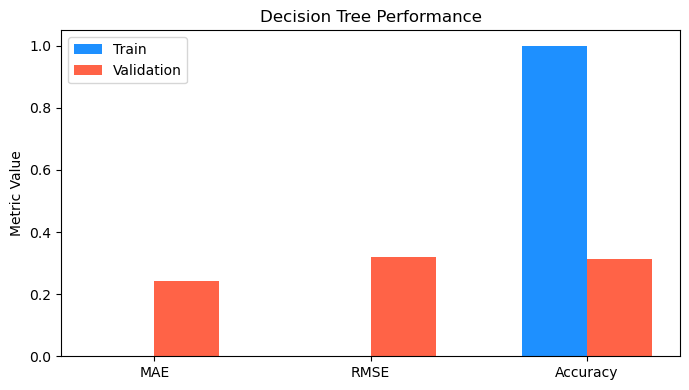

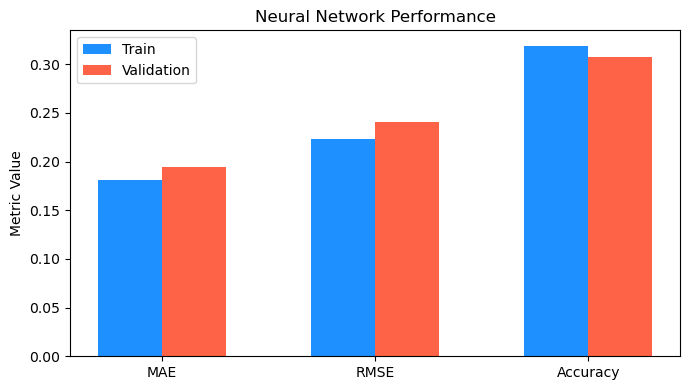

In [11]:

# ------------------ VISUALIZE MODEL PERFORMANCE ------------------

def plot_metrics(title, train_metrics, val_metrics):
    labels = list(train_metrics.keys())
    x = np.arange(len(labels))
    train_vals = list(train_metrics.values())
    val_vals = list(val_metrics.values())

    plt.figure(figsize=(7, 4))
    plt.bar(x - 0.15, train_vals, width=0.3, label='Train', color='dodgerblue')
    plt.bar(x + 0.15, val_vals, width=0.3, label='Validation', color='tomato')
    plt.xticks(x, labels)
    plt.ylabel("Metric Value")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_metrics("Decision Tree Performance", dt_train_metrics, dt_val_metrics)
plot_metrics("Neural Network Performance", mlp_train_metrics, mlp_val_metrics)


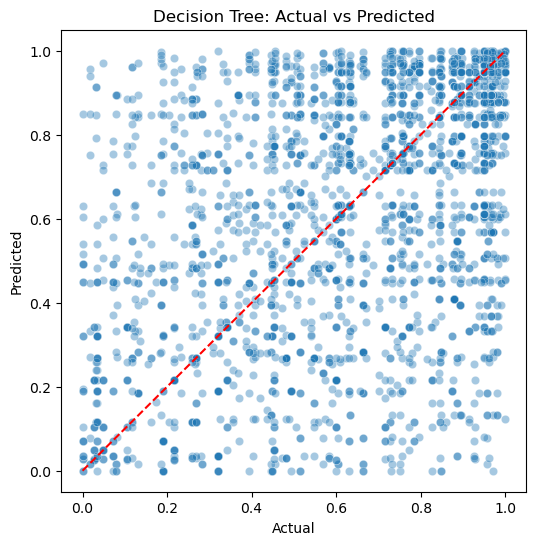

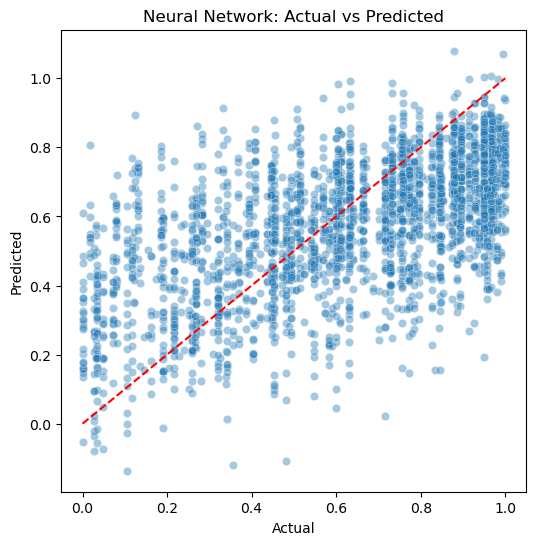

In [12]:
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.4)
    plt.plot([0, 1], [0, 1], '--', color='red')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.show()

plot_predictions(y_val, dt_preds, "Decision Tree: Actual vs Predicted")
plot_predictions(y_val, mlp_preds, "Neural Network: Actual vs Predicted")